# Revealing Bias in Traffic Stops From a Decade of Policing Data from Nashville
## Du Bai

## Project Description

My project has two objectives. First, I want to train a model that predicts the outcome of traffic stops (i.e. warning, citation, and arrest) based on various conditions of the traffic stop, including date, time, driver’s race, sex, age, search performed, frisk performed, and contraband found. Second, I want to potentially use this model to reveal the biases of the police – did Nashville police take into account some information that they shouldn’t consider, such as the age, sex, and gender of the driver? 

I am using Stanford University’s OpenPolicing project's data on traffic stops in Nashville, TN. This data set contains more than 3 million samples (stops) from December 2009 to March 2019, each including 14 features that describe the traffic stops' condition, the stopped drivers’ personal information, types of police action, and reasoning for the action. Because of the size limit of file upload on Moodle, I cannot directly upload my dataset, so I included the download link to this dataset in my submission.

For the first objective, I demonstrate my results by showing the accuracy of the best model that I have trained; in terms of the second objective, I visualize the difference between the model trained without various features and the model that accounts for all of the features. Since I’m using the decision tree algorithm, I also plan to visualize the decision tree branches to further show how various features contribute to the decision process.

## Methodology

I plan to achieve the first objective, which is a fairly standard classification task, by trying various machine-learning algorithms and comparing their results. I will also be performing feature engineering to improve the accuracy of the classification algorithm. 

For the second objective, I plan to run the classification model with various features taken out individually and compare the results to the model that has access to all of the features. If there is a negative impact on the accuracy of classification when a feature is taken out, then I can conclude that that feature is considered in the decision-making process. I also plan to examine the decision tree of the model trained with all of the information to get more information about the biases.

### Feature Engineering
To train the models, I have done a significant amount of feature engineering. First, I group the features into three categories based on their meanings to better understand what factors influence the outcome: (a) subject_info: the age, sex, and race of the subject of the traffic stop; (b) event_info: what actually happened in the stop, including whether contrabands were found during the stop, whether the contrabands were drugs, whether the contrabands were weapons, whether a frisk was performed, whether a search was conducted, whether the subject was searched, whether the vehicle was searched, what was the basis of the search, and what was the reason for the stop; (C) time_info: the date and time of the traffic stop. 

Second, I tried to put ages of the subjects into age brackets (<18, 18-24, 25-34, 35-44, 45-54, 55-64, >64), hoping to provide more information for the classifier. However, this did not bring any perceivable improvement in terms of the accuracy of the model when trained with all features as well as only subject_info and time_info.

Third, I tried to provide extra information regarding the date of the traffic stop. I imported a calendar to create two new boolean features: if a given date is a US Holiday, and if it is a weekend. I also created two additional features with only the day of the month as well as the month of a given date (for example, May 13th would have 13 as its value for the 'day_of_month' feature, and 5 for its 'month' feature). This resulted in significant improvement in the performance of the model.

Lastly, because many of the features in this dataset are categorical, I one-hot coded all of the features.


### The First Objective: training a successful model
After trying out various classification algorithms, including Adaline, SVM, decision tree, random forest, and logistic regression, I found that the decision tree model works very well to classify the outcomes of the traffic stop. In fact, when using all of the features and 500k samples, the decision tree model can achieve a classification accuracy of more than 99.78%. This demonstrates that I have successfully trained a model that can predict the outcome of traffic stops based on various conditions about the traffic stop and that I have achieved my first objective.

### The Second Objective: revealing potential biases

#### Difference between models trained on different sets of features:
The results of training the model with different sets of features are very interesting. Taking out gender accounts for a 0.09% drop in prediction accuracy, decreasing the accuracy score to 99.695%; Taking out race accounts for a 0.15% drop in accuracy, decreasing the accuracy score to 99.695%; while not considering age result in a notable 5% drop, decreasing the accuracy score to 95.12%. Interestingly, ignoring the date of the stop when training the model leads to a rather significant 19% decrease in accuracy. These numbers, of course, do not suggest the relative importance of each feature, but merely suggest that these factors are in fact influencing the decision-making of the police. They do suggest, however, that age of the subject and the date of the traffic stop are important factors that influence the outcome of a traffic stop.

To further investigate the issue, I trained a model with only the subject's age, race, and gender which achieves a 46.22% accuracy, while training only with the date of the stop achieves a 46.48% accuracy. I also trained a model by combining the information about the date of the stop, the subject’s age, race, and gender. To my surprise, this model trained on seemingly arbitrary information that has nothing to do with what actually happened during the stop achieved a 91.5% prediction accuracy. The difference in the accuracy of these models is shown in the figure below.

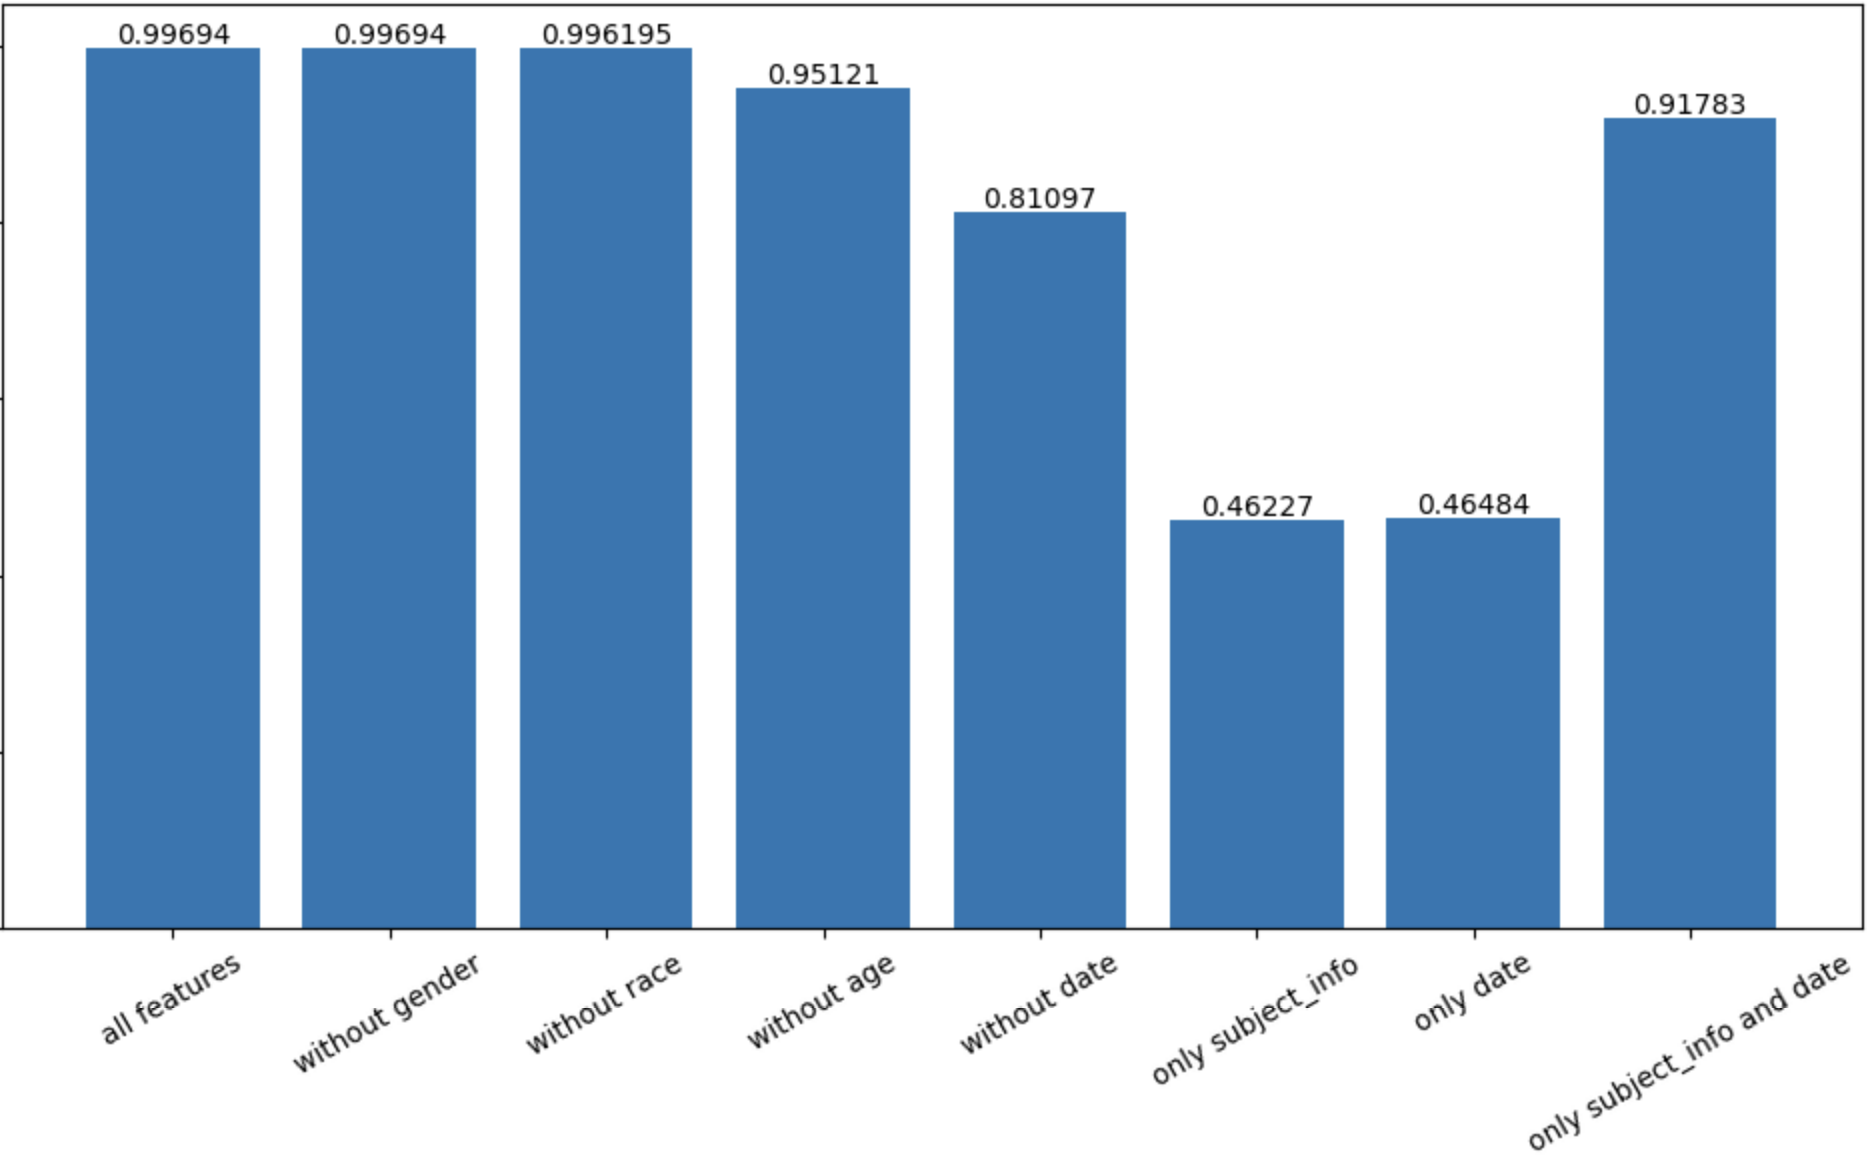

#### Examining the Decision Tree
Because I am using a decision tree classifier, I hoped to interpret these results by looking at the decision tree. However, I realized that the decision tree is simply too large to thoroughly analyze -- to achieve the level of performance discussed above, the decision trees have depths of at least 30, and around 6000 leaves. Decreasing the max_depths of the classifier would reduce the performance significantly, as shown in the graph below.

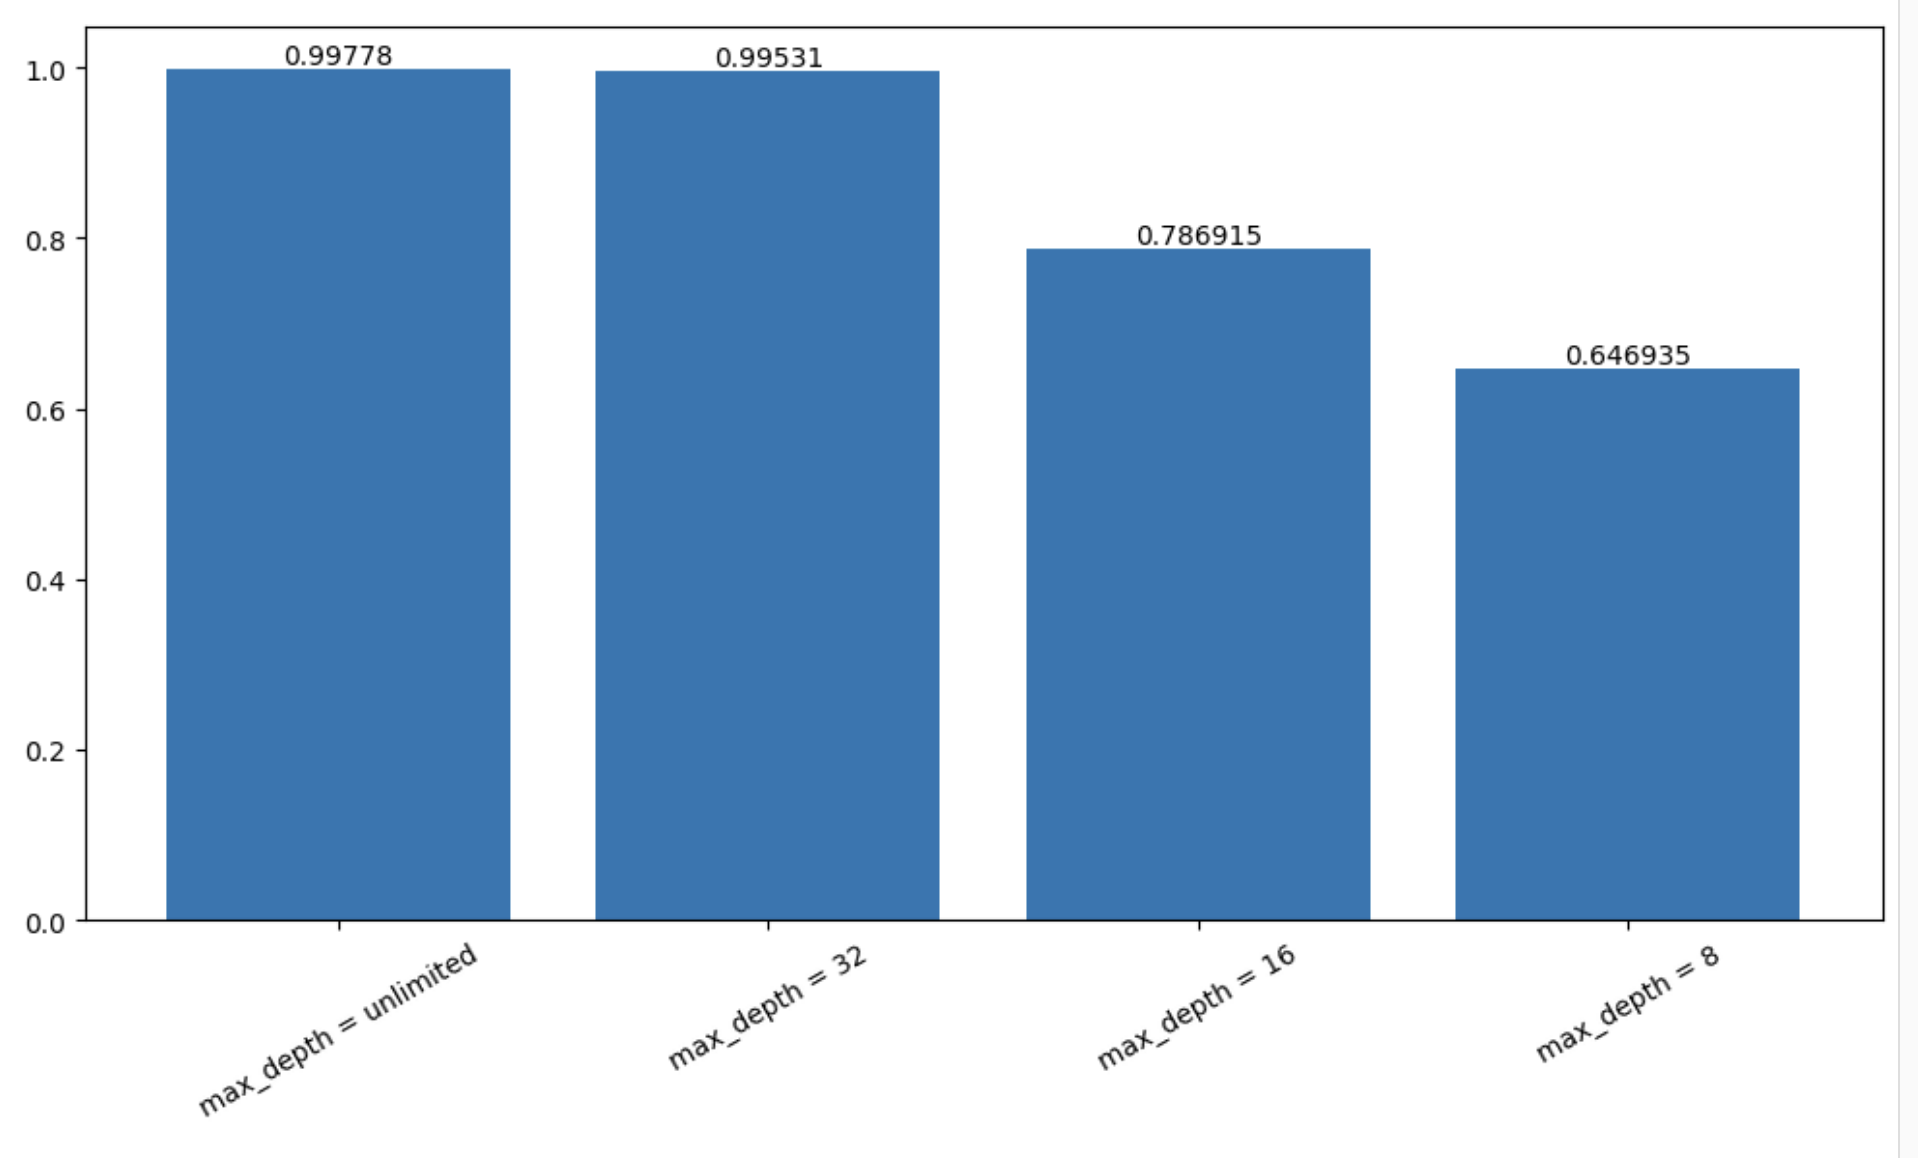

Therefore, I decided to only showcase some examples of branches in the decision tree that are potentially the result of biases. Of course, there are many counterexamples of these cases, as I am simply demonstrating specific cases, which might not be generalizable.

Example 1: In some cases, black drivers are issued citations or arrested, but non-black drivers only receive a warning

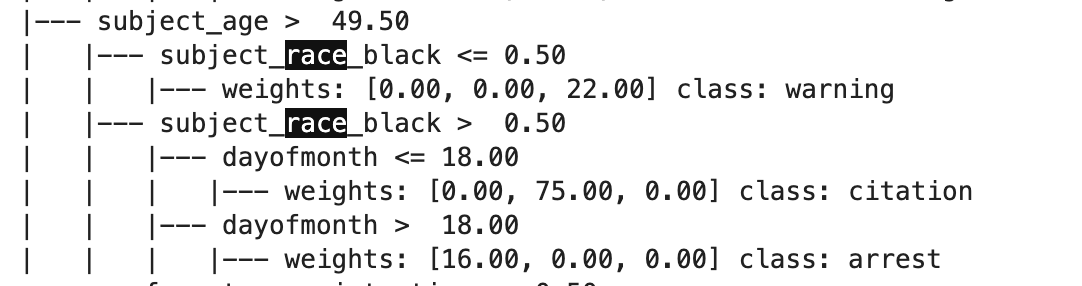

Example 2: In some cases, younger drivers tend to experience more severe outcomes. For example, when many, although not all, other conditions are the same, drivers aged 28 or less are arrested, but drivers over 28 only receive warnings. Drivers between the age of 34.5 and 39, however, face arrest, while drivers over the age of 39 only receive citations.

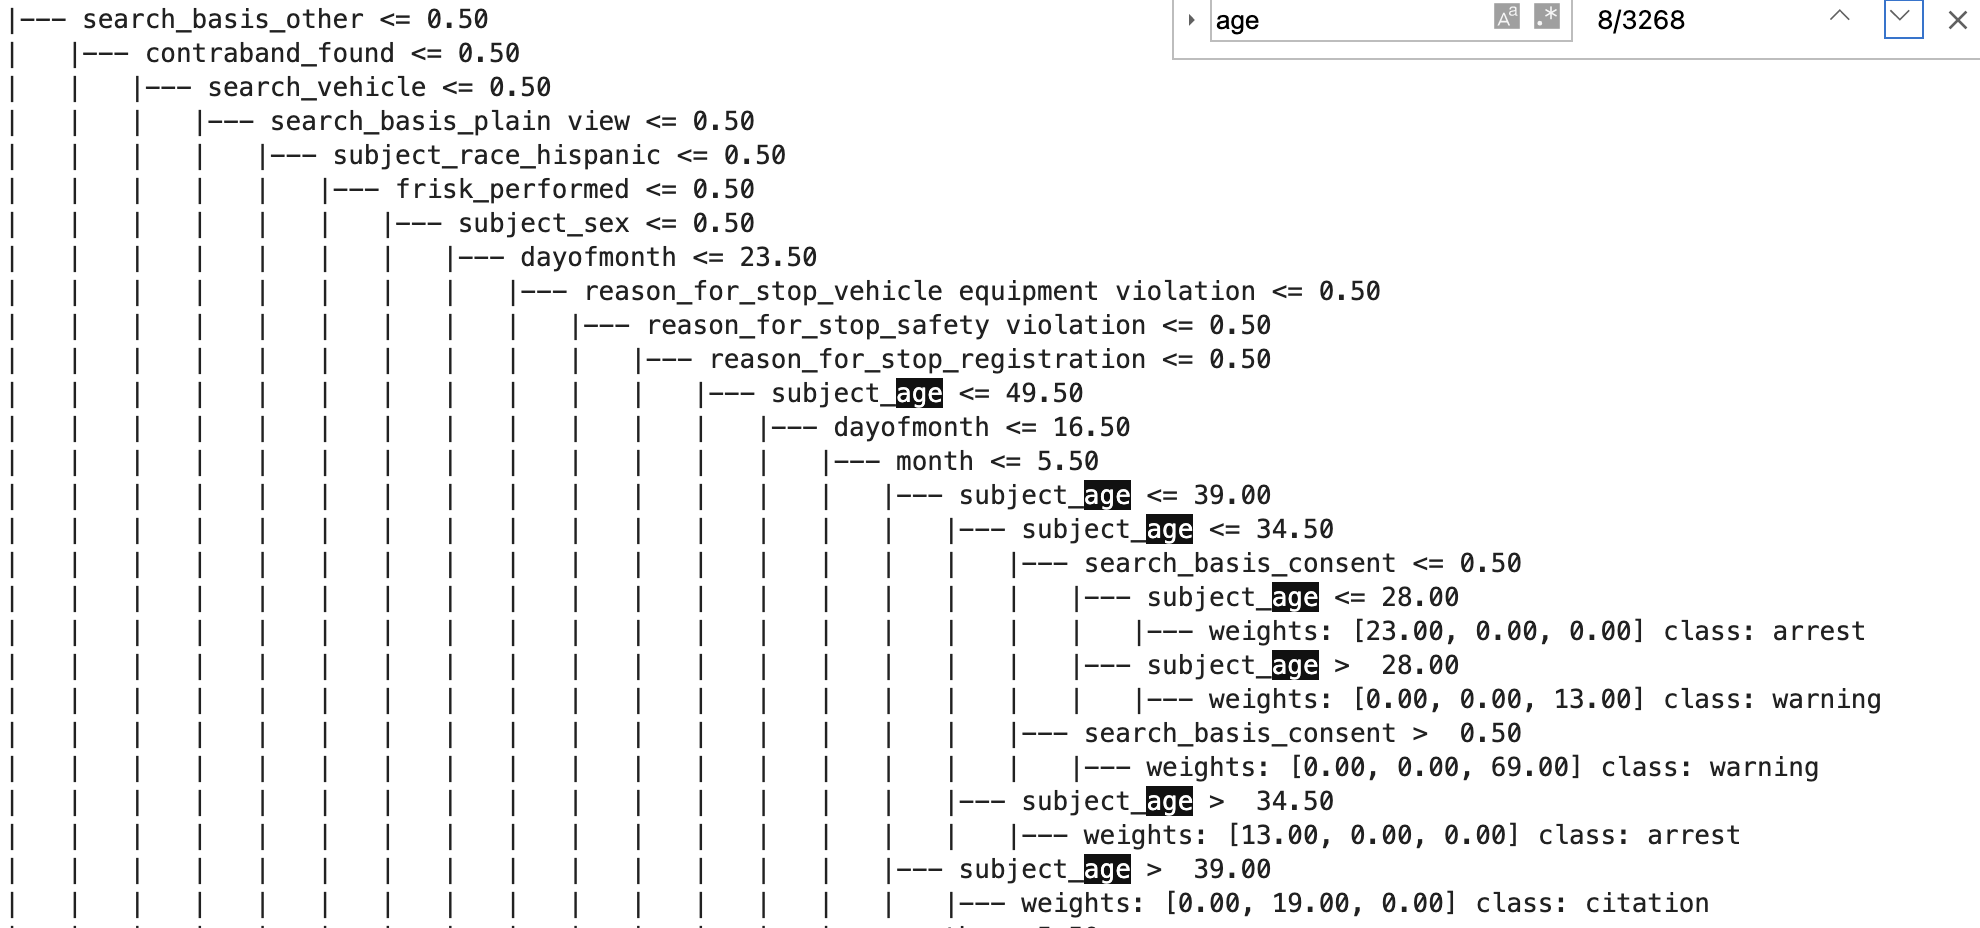

Example 3: In some cases, if a traffic stop happens later in a month, then the outcome is likely to be more severe. For example, under certain conditions, traffic stops before the the 18th of a given month results in citation, while stops after the 18th end up in arrests.

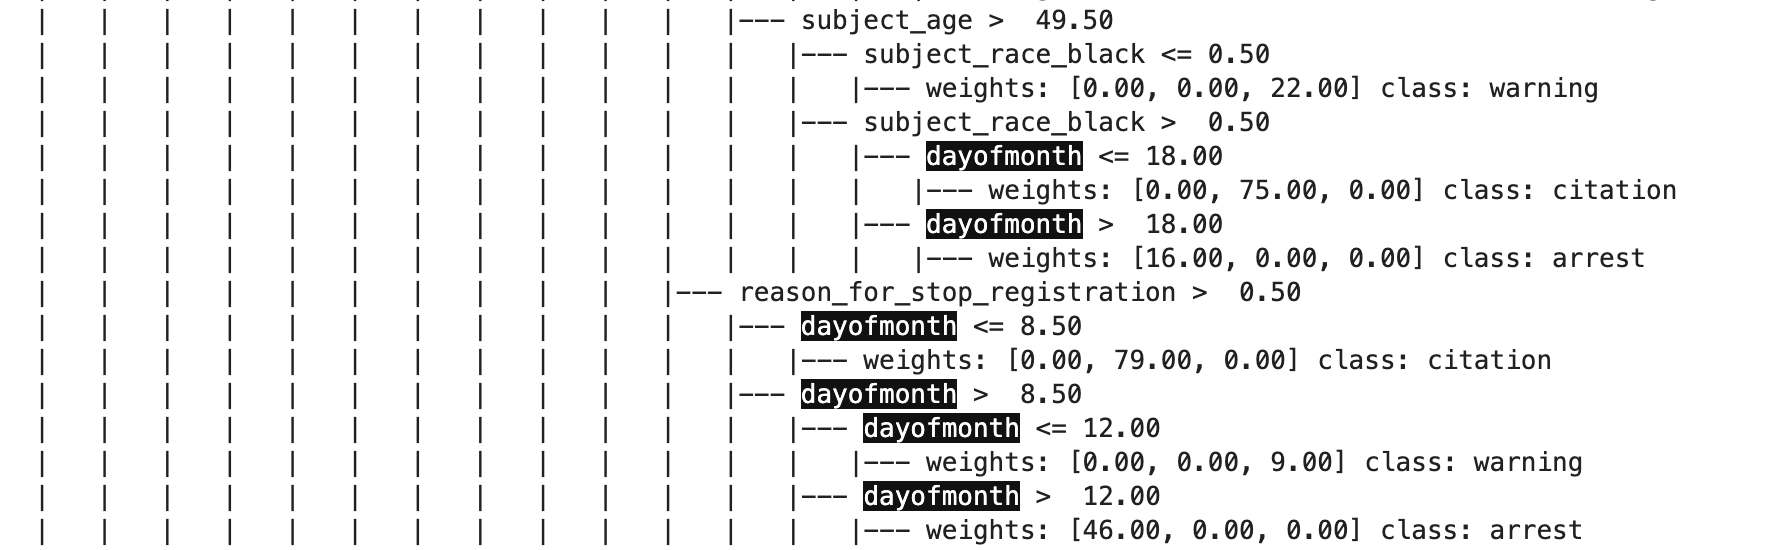

This decision tree, which has 99.78% accuracy, is stored in "best_tree_rep.txt" included in this folder.

## Conclusion and Implication

In this project, I have successfully trained a decision tree classifier to predict the outcome of a traffic stop based on information regarding the traffic stop. The results shown above suggest that the decision-making process of Nashville police from 2009 to 2019 did involve biased, or at least unfair, thinking. Although I have not shown that race and gender do not significantly impact the outcome, the age of the driver and the date of the traffic stop do have a noticeable impact on the outcome. If two drivers of different ages receive different penalties for doing the exact same thing, then it is obviously unfair. Similarly, if two drivers doing the exact same thing receive different penalties only because the traffic stop happened on different days, the decision-making process of the police is also unfair. In addition, by examining the decision tree, I pointed out specific cases that might involve unfair decision-making. Under specific conditions, younger drivers tend to receive harsher penalties than older drivers, and traffic stops that happen later in the month have more severe outcomes than traffic stops earlier in the month. However, more research is needed to confirm that these cases are representative of a general phenomenon. Overall, my project accomplished the two objectives that I set at the beginning.

These results suggest that there are unfair or biased elements in the decision-making process of Nashville police. Therefore, this project contributes to the larger social conversation regarding police injustice and intersectional bias entrenched in our society by using quantitative methods to demonstrate the existence of unfairness and biases. 


## Suggestion for Future Work

This project has many limitations, which means that there is a lot of space for future work. First, I did not thoroughly analyze the decision tree but only picked out some particular examples that demonstrate the potential biases. It would be interesting to use some statistical methods to analyze the entire decision tree of the model. In addition, this can even incorporate qualitative sociological or anthropological methods to further reveal the decision process of police officers. For example, qualitative critical analysis might explain the reason that in certain cases, traffic stops happened later in a month have more severe outcomes. 

Second, because I'm using machine learning techniques, I can only show that age and date have a noticeable impact on the decision-making of Nashville police. I cannot suggest, however, how much impact each feature has. Further exploration can focus on using other methods, such as statistical analysis and causal inference, to explore the relative influence of age, racial, or gender bias, as well as the unfairness as the result of time, in greater detail. Additional statistical analysis can also help reveal more specifics regarding the biases: is it true in general that younger drivers tend to receive harsher penalties, as I have demonstrated above in specific cases?

Third, I only attempted to train the model based on the traffic policing data, where most of the information regarding the driver cannot be perceived by the police before the traffic stop, simply because the police cannot see the driver in the car very well most of the time. Pedestrian stops, on the other hand, allow police to see the subject before engaging in the stop. This difference might be significant in terms of understanding bias in the decision-making of the police. Therefore, analyzing data specific to pedestrian stops would be valuable.


## Related Works

Pierson, E., Simoiu, C., Overgoor, J. et al. A large-scale analysis of racial disparities in police stops across the United States. Nat Hum Behav 4, 736–745 (2020). https://doi.org/10.1038/s41562-020-0858-1

Simoiu, Camelia and Corbett-Davies, Sam and Goel, Sharad, The Problem of Infra-Marginality in Outcome Tests for Discrimination (July 18, 2016). Available at SSRN: https://ssrn.com/abstract=2811449 or http://dx.doi.org/10.2139/ssrn.2811449

Goel, Sharad, Maya Perelman, Ravi Shroff, and David Alan Sklansky. "Combatting Police Discrimination in the Age of Big Data." New Criminal Law Review (2016), Forthcoming.

Goel, Sharad and Rao, Justin M. and Shroff, Ravi, Precinct or Prejudice? Understanding Racial Disparities in New York City's Stop-and-Frisk Policy (March 2, 2015). Annals of Applied Statistics, Vol. 10, No. 1, 365–394, 2016, Available at SSRN: https://ssrn.com/abstract=2572718 or http://dx.doi.org/10.2139/ssrn.2572718

# Code

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

plt.rcdefaults() # set the matplotlib runtime configuration (rc) to its defaults

In [4]:
df = pd.read_csv('tn_nashville_2020_04_01.csv') #reading file
df = df.dropna()

/cm/shared/apps/jupyter/current/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
#grouping features

subject_info = ['subject_age', 'subject_race', 'subject_sex']
event_info = ['contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle','search_basis','reason_for_stop']
time_info = ['date', 'time']
lables = ['date', 'time', 'location', 'lat', 'lng', 'precinct',
       'reporting_area', 'zone', 
          'subject_age', 'subject_race', 'subject_sex',
          'officer_id_hash', 'type', 'violation', 'arrest_made','citation_issued', 'warning_issued', 'outcome', 
          'contraband_found','contraband_drugs', 'contraband_weapons', 'frisk_performed','search_conducted', 'search_person', 'search_vehicle', 'search_basis','reason_for_stop', 'vehicle_registration_state']
for l in lables:
    print (df[l].value_counts(True))
    print('----')

2016-01-14    0.001577
2014-09-20    0.001305
2016-03-02    0.001305
2016-01-07    0.001305
2015-02-26    0.001250
                ...   
2010-01-23    0.000054
2011-07-09    0.000054
2010-01-25    0.000054
2010-07-07    0.000054
2010-10-10    0.000054
Name: date, Length: 2424, dtype: float64
----
22:00:00    0.003099
20:30:00    0.002664
17:00:00    0.002555
17:30:00    0.002392
00:15:00    0.002338
              ...   
07:32:00    0.000054
07:23:00    0.000054
07:48:00    0.000054
10:29:00    0.000054
07:10:00    0.000054
Name: time, Length: 1426, dtype: float64
----
S 5TH ST & SHELBY AVE, NASHVILLE, TN, 37206                  0.004240
HARDING PL & NOLENSVILLE PIKE, NASHVILLE, TN, 37211          0.004132
MURFREESBORO PIKE & THOMPSON PL, NASHVILLE, TN, 37217        0.004077
CENTRAL PIKE & OLD HICKORY BLVD, HERMITAGE, TN, 37076        0.003642
NOLENSVILLE PIKE & OLD HICKORY BLVD, NASHVILLE, TN, 37211    0.003425
                                                               ...   
FAWN

In [6]:
police = resample(df, n_samples = 500000)

In [7]:
acc_scores = {}

## Using Subject_info, Event_info, and Date information (i.e. all available features)

### Benchmark

In [8]:
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar

dates = pd.to_datetime(police['date'])

cal = USFederalHolidayCalendar()
USholidays = cal.holidays(start='2009-01-01', end='2019-12-31').to_pydatetime()

holiday = pd.Series(0, index=np.arange(len(dates)))
weekend = pd.Series(0, index=np.arange(len(dates)))
months = pd.Series(0, index=np.arange(len(dates)))
days = pd.Series(0, index=np.arange(len(dates)))

for i in range(len(dates)):
    d = dates.iloc[i]
    months[i] = d.month
    days[i] = d.day
    if d in USholidays:
        holiday[i]=1
    if d.weekday()>4:
        weekend[i]=1

In [9]:
X = police[np.concatenate((subject_info,event_info))]
y = police['outcome']


X['month'] = months.values
X['dayofmonth'] = days.values

X['weekend'] = weekend.values
X['holiday'] = holiday.values

#map sex
X['subject_sex'] = X['subject_sex'].squeeze(axis=0).map({'male':1,'female':0})


#map event_info
labels2 = ['contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle']
for l2 in labels2:
    X[l2] = X[l2].squeeze(axis=0).map({True:1,False:0})

X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

/tmp/ipykernel_3605699/108404619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month'] = months.values
/tmp/ipykernel_3605699/108404619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dayofmonth'] = days.values
/tmp/ipykernel_3605699/108404619.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [10]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10,scoring='accuracy',error_score='raise')

print("Accuracy: " + str(round(scores.mean(), 6)) + 
          " Stdev: " + str(round(scores.std(), 6)))

Accuracy: 0.997727 Stdev: 0.000251


In [12]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])

acc_scores['all features'] = clf.score(X_test, y_test)

reducing_depth = {}
reducing_depth['max_depth = unlimited'] = clf.score(X_test, y_test)
print('Accuracy:', clf.score(X_test, y_test))

Misclassified test set examples: 460
Out of a total of: 200000
Accuracy: 0.9977


In [20]:
text_representation = tree.export_text(clf, feature_names=X_train.columns.values.tolist(),show_weights=True,max_depth=100)
print(text_representation)

with open('best_tree_rep.txt', 'w') as f:
    f.write(text_representation)
    f.close

|--- search_basis_other <= 0.50
|   |--- contraband_found <= 0.50
|   |   |--- search_vehicle <= 0.50
|   |   |   |--- search_basis_plain view <= 0.50
|   |   |   |   |--- frisk_performed <= 0.50
|   |   |   |   |   |--- subject_sex <= 0.50
|   |   |   |   |   |   |--- dayofmonth <= 24.50
|   |   |   |   |   |   |   |--- month <= 5.50
|   |   |   |   |   |   |   |   |--- reason_for_stop_vehicle equipment violation <= 0.50
|   |   |   |   |   |   |   |   |   |--- subject_age <= 46.50
|   |   |   |   |   |   |   |   |   |   |--- subject_age <= 20.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [31.00, 0.00, 0.00] class: arrest
|   |   |   |   |   |   |   |   |   |   |--- subject_age >  20.00
|   |   |   |   |   |   |   |   |   |   |   |--- month <= 4.50
|   |   |   |   |   |   |   |   |   |   |   |   |--- age_group_u45 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |   |   |--- reason_for_stop_moving traffic violation <= 0.50
|   |   |   |   |   |   |   |   |   |   |   

### Making Age Group

In [14]:
X = police[np.concatenate((subject_info,event_info))]
y = police['outcome']


X['month'] = months.values
X['dayofmonth'] = days.values

X['weekend'] = weekend.values
X['holiday'] = holiday.values

#make age groups
bins=[0,18,25,35,45,55,65,110]
labels = ['u18','u25','u35','u45','u55','u65','a65']
X['age_group'] = pd.cut(X['subject_age'], bins=bins, labels=labels)

#map sex
X['subject_sex'] = X['subject_sex'].squeeze(axis=0).map({'male':1,'female':0})

#map event_info
labels2 = ['contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle']
for l2 in labels2:
    X[l2] = X[l2].squeeze(axis=0).map({True:1,False:0})

X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)



/tmp/ipykernel_3605699/4208874334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month'] = months.values
/tmp/ipykernel_3605699/4208874334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dayofmonth'] = days.values
/tmp/ipykernel_3605699/4208874334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [15]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10,scoring='accuracy',error_score='raise')

print("Accuracy: " + str(round(scores.mean(), 6)) + 
          " Stdev: " + str(round(scores.std(), 6)))

Accuracy: 0.997727 Stdev: 0.000251


In [16]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])

acc_scores['all features'] = clf.score(X_test, y_test)
reducing_depth['max_depth = 32'] = clf.score(X_test, y_test)

reducing_depth = {}
reducing_depth['max_depth = unlimited'] = clf.score(X_test, y_test)
print('Accuracy:', clf.score(X_test, y_test))

Misclassified test set examples: 460
Out of a total of: 200000
Accuracy: 0.9977


In [19]:
text_representation = tree.export_text(clf, feature_names=X_train.columns.values.tolist(),show_weights=True,max_depth=100)
print(text_representation)

|--- search_basis_other <= 0.50
|   |--- contraband_found <= 0.50
|   |   |--- search_vehicle <= 0.50
|   |   |   |--- search_basis_plain view <= 0.50
|   |   |   |   |--- frisk_performed <= 0.50
|   |   |   |   |   |--- subject_sex <= 0.50
|   |   |   |   |   |   |--- dayofmonth <= 24.50
|   |   |   |   |   |   |   |--- month <= 5.50
|   |   |   |   |   |   |   |   |--- reason_for_stop_vehicle equipment violation <= 0.50
|   |   |   |   |   |   |   |   |   |--- subject_age <= 46.50
|   |   |   |   |   |   |   |   |   |   |--- subject_age <= 20.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [31.00, 0.00, 0.00] class: arrest
|   |   |   |   |   |   |   |   |   |   |--- subject_age >  20.00
|   |   |   |   |   |   |   |   |   |   |   |--- month <= 4.50
|   |   |   |   |   |   |   |   |   |   |   |   |--- age_group_u45 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |   |   |--- reason_for_stop_moving traffic violation <= 0.50
|   |   |   |   |   |   |   |   |   |   |   

### Reducing max_depth

In [21]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth = 32)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', clf.score(X_test, y_test))

reducing_depth['max_depth = 32'] = clf.score(X_test, y_test)

Misclassified test set examples: 963
Out of a total of: 200000
Accuracy: 0.995185


In [22]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth = 16)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', clf.score(X_test, y_test))

reducing_depth['max_depth = 16'] = clf.score(X_test, y_test)

Misclassified test set examples: 43270
Out of a total of: 200000
Accuracy: 0.78365


In [23]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth = 8)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', clf.score(X_test, y_test))

reducing_depth['max_depth = 8'] = clf.score(X_test, y_test)

Misclassified test set examples: 69807
Out of a total of: 200000
Accuracy: 0.650965


## Taking out different features

### Using all available information except gender

In [24]:
X = police[np.concatenate((subject_info,event_info))]
y = police['outcome']


X['month'] = months.values
X['dayofmonth'] = days.values

X['weekend'] = weekend.values
X['holiday'] = holiday.values

X = X.drop('subject_sex',axis =1)


#map event_info
labels2 = ['contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle']
for l2 in labels2:
    X[l2] = X[l2].squeeze(axis=0).map({True:1,False:0})

X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

/tmp/ipykernel_3605699/287638764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month'] = months.values
/tmp/ipykernel_3605699/287638764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dayofmonth'] = days.values
/tmp/ipykernel_3605699/287638764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [25]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10,scoring='accuracy',error_score='raise')

print("Accuracy: " + str(round(scores.mean(), 6)) + 
          " Stdev: " + str(round(scores.std(), 6)))

Accuracy: 0.996973 Stdev: 0.00025


In [26]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])

acc_scores['without gender'] = clf.score(X_test, y_test)
print('Accuracy:', clf.score(X_test, y_test))

Misclassified test set examples: 615
Out of a total of: 200000
Accuracy: 0.996925


### Using all available information except race

In [27]:
X = police[np.concatenate((subject_info,event_info))]
y = police['outcome']


X['month'] = months.values
X['dayofmonth'] = days.values

X['weekend'] = weekend.values
X['holiday'] = holiday.values

X = X.drop('subject_race',axis =1)

#map sex
X['subject_sex'] = X['subject_sex'].squeeze(axis=0).map({'male':1,'female':0})

#map event_info
labels2 = ['contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle']
for l2 in labels2:
    X[l2] = X[l2].squeeze(axis=0).map({True:1,False:0})

X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

/tmp/ipykernel_3605699/2489648631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month'] = months.values
/tmp/ipykernel_3605699/2489648631.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dayofmonth'] = days.values
/tmp/ipykernel_3605699/2489648631.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [28]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10,scoring='accuracy',error_score='raise')

print("Accuracy: " + str(round(scores.mean(), 6)) + 
          " Stdev: " + str(round(scores.std(), 6)))

Accuracy: 0.99612 Stdev: 0.000239


In [29]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])

acc_scores['without race'] = clf.score(X_test, y_test)
print('Accuracy:', clf.score(X_test, y_test))

Misclassified test set examples: 861
Out of a total of: 200000
Accuracy: 0.995695


In [30]:
X_train.columns

Index(['subject_age', 'subject_sex', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'frisk_performed', 'search_conducted',
       'search_person', 'search_vehicle', 'month', 'dayofmonth', 'weekend',
       'holiday', 'search_basis_consent', 'search_basis_other',
       'search_basis_plain view', 'search_basis_probable cause',
       'reason_for_stop_child restraint', 'reason_for_stop_investigative stop',
       'reason_for_stop_moving traffic violation',
       'reason_for_stop_parking violation', 'reason_for_stop_registration',
       'reason_for_stop_safety violation',
       'reason_for_stop_seatbelt violation',
       'reason_for_stop_vehicle equipment violation'],
      dtype='object')

### Using all available information except age

In [31]:
X = police[np.concatenate((subject_info,event_info))]
y = police['outcome']


X['month'] = months.values
X['dayofmonth'] = days.values

X['weekend'] = weekend.values
X['holiday'] = holiday.values

X = X.drop('subject_age',axis =1)

#map sex
X['subject_sex'] = X['subject_sex'].squeeze(axis=0).map({'male':1,'female':0})

#map event_info
labels2 = ['contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle']
for l2 in labels2:
    X[l2] = X[l2].squeeze(axis=0).map({True:1,False:0})

X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

/tmp/ipykernel_3605699/1430738033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month'] = months.values
/tmp/ipykernel_3605699/1430738033.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dayofmonth'] = days.values
/tmp/ipykernel_3605699/1430738033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [32]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10,scoring='accuracy',error_score='raise')

print("Accuracy: " + str(round(scores.mean(), 6)) + 
          " Stdev: " + str(round(scores.std(), 6)))

Accuracy: 0.950923 Stdev: 0.001056


In [33]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])

acc_scores['without age'] = clf.score(X_test, y_test)
print('Accuracy:', clf.score(X_test, y_test))

Misclassified test set examples: 9752
Out of a total of: 200000
Accuracy: 0.95124


### Using all available information except date

In [34]:
X = police[np.concatenate((subject_info,event_info))]
y = police['outcome']

#map sex
X['subject_sex'] = X['subject_sex'].squeeze(axis=0).map({'male':1,'female':0})

#map event_info
labels2 = ['contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle']
for l2 in labels2:
    X[l2] = X[l2].squeeze(axis=0).map({True:1,False:0})

X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

/tmp/ipykernel_3605699/3075406538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['subject_sex'] = X['subject_sex'].squeeze(axis=0).map({'male':1,'female':0})
/tmp/ipykernel_3605699/3075406538.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[l2] = X[l2].squeeze(axis=0).map({True:1,False:0})


In [35]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10,scoring='accuracy',error_score='raise')

print("Accuracy: " + str(round(scores.mean(), 6)) + 
          " Stdev: " + str(round(scores.std(), 6)))

Accuracy: 0.811217 Stdev: 0.002091


In [36]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])

acc_scores['without date'] = clf.score(X_test, y_test)
print('Accuracy:', clf.score(X_test, y_test))

Misclassified test set examples: 37845
Out of a total of: 200000
Accuracy: 0.810775


## Using only subject_info

In [37]:
X = police[subject_info]
y = police['outcome']

#map sex
X['subject_sex'] = X['subject_sex'].squeeze(axis=0).map({'male':1,'female':0})

X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

/tmp/ipykernel_3605699/3990598465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['subject_sex'] = X['subject_sex'].squeeze(axis=0).map({'male':1,'female':0})


In [38]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10,scoring='accuracy',error_score='raise')

print("Accuracy: " + str(round(scores.mean(), 6)) + 
          " Stdev: " + str(round(scores.std(), 6)))

Accuracy: 0.461477 Stdev: 0.001906


In [39]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])

acc_scores['only subject_info'] = clf.score(X_test, y_test)
print('Accuracy:', clf.score(X_test, y_test))

Misclassified test set examples: 107393
Out of a total of: 200000
Accuracy: 0.463035


In [40]:
X_train.columns

Index(['subject_age', 'subject_sex', 'subject_race_asian/pacific islander',
       'subject_race_black', 'subject_race_hispanic', 'subject_race_other',
       'subject_race_unknown', 'subject_race_white'],
      dtype='object')

## Using only date

In [41]:
X = pd.DataFrame()
X['month'] = months.values
X['dayofmonth'] = days.values

X['holiday'] = holiday.values
X['weekend'] = weekend.values

X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

In [43]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10,scoring='accuracy',error_score='raise')

print("Accuracy: " + str(round(scores.mean(), 6)) + 
          " Stdev: " + str(round(scores.std(), 6)))

Accuracy: 0.466503 Stdev: 0.003499


In [44]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])

acc_scores['only date'] = clf.score(X_test, y_test)
print('Accuracy:', clf.score(X_test, y_test))

Misclassified test set examples: 106726
Out of a total of: 200000
Accuracy: 0.46637


In [45]:
X_train.columns

Index(['month', 'dayofmonth', 'holiday', 'weekend'], dtype='object')

## Using only date and subject_info features

In [46]:
X = police[subject_info]
y = police['outcome']


X['month'] = months.values
X['dayofmonth'] = days.values

X['holiday'] = holiday.values
X['weekend'] = weekend.values

#map sex
X['subject_sex'] = X['subject_sex'].squeeze(axis=0).map({'male':1,'female':0})

'''
#map event_info
labels2 = ['contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle']
for l2 in labels2:
    X[l2] = X[l2].squeeze(axis=0).map({True:1,False:0})
'''

X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

/tmp/ipykernel_3605699/1365287406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month'] = months.values
/tmp/ipykernel_3605699/1365287406.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dayofmonth'] = days.values
/tmp/ipykernel_3605699/1365287406.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [47]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10,scoring='accuracy',error_score='raise')

print("Accuracy: " + str(round(scores.mean(), 6)) + 
          " Stdev: " + str(round(scores.std(), 6)))

Accuracy: 0.917383 Stdev: 0.00143


In [48]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])

acc_scores['only subject_info and date'] = clf.score(X_test, y_test)
print('Accuracy:', clf.score(X_test, y_test))

Misclassified test set examples: 16421
Out of a total of: 200000
Accuracy: 0.917895


In [49]:
text_representation = tree.export_text(clf, feature_names=X_train.columns.values.tolist(),show_weights=True,max_depth=100)
print(text_representation)

with open('best_tree_rep.txt', 'w') as f:
    f.write(text_representation)
    f.close

|--- subject_age <= 17.50
|   |--- subject_age <= 16.50
|   |   |--- subject_race_white <= 0.50
|   |   |   |--- dayofmonth <= 29.50
|   |   |   |   |--- subject_race_other <= 0.50
|   |   |   |   |   |--- month <= 4.50
|   |   |   |   |   |   |--- subject_sex <= 0.50
|   |   |   |   |   |   |   |--- dayofmonth <= 5.00
|   |   |   |   |   |   |   |   |--- weights: [30.00, 0.00, 0.00] class: arrest
|   |   |   |   |   |   |   |--- dayofmonth >  5.00
|   |   |   |   |   |   |   |   |--- month <= 3.50
|   |   |   |   |   |   |   |   |   |--- subject_race_unknown <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 56.00, 0.00] class: citation
|   |   |   |   |   |   |   |   |   |--- subject_race_unknown >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [16.00, 0.00, 0.00] class: arrest
|   |   |   |   |   |   |   |   |--- month >  3.50
|   |   |   |   |   |   |   |   |   |--- subject_age <= 15.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [12.00, 0.0

In [50]:
X_train.columns

Index(['subject_age', 'subject_sex', 'month', 'dayofmonth', 'holiday',
       'weekend', 'subject_race_asian/pacific islander', 'subject_race_black',
       'subject_race_hispanic', 'subject_race_other', 'subject_race_unknown',
       'subject_race_white'],
      dtype='object')

## Comparing models trained with different features

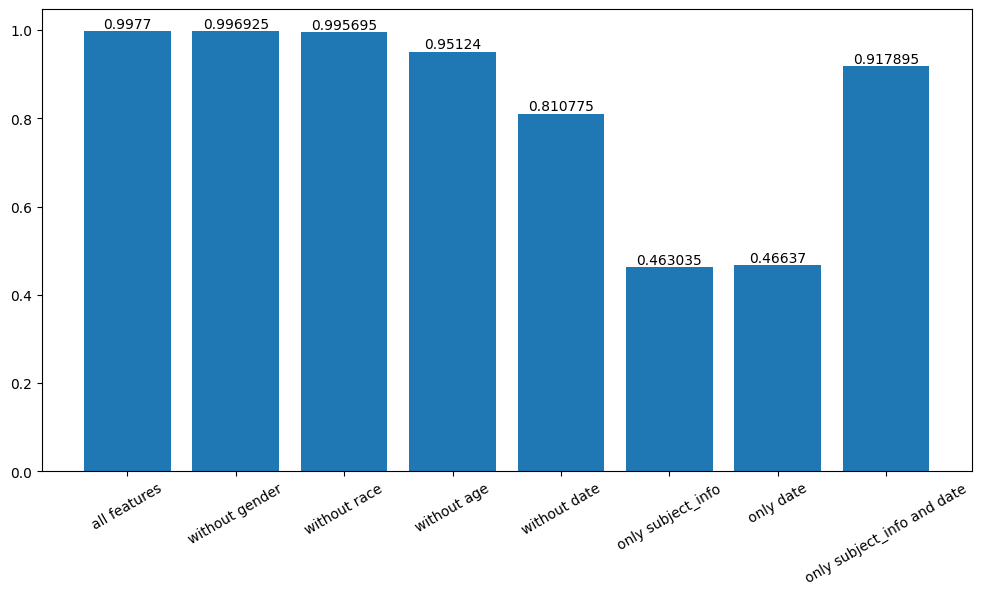

In [51]:
indexes = acc_scores.keys()
values = acc_scores.values()

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(indexes, values)
ax.bar_label(bars)
plt.xticks(rotation=30)

plt.savefig('acc_scores.png')

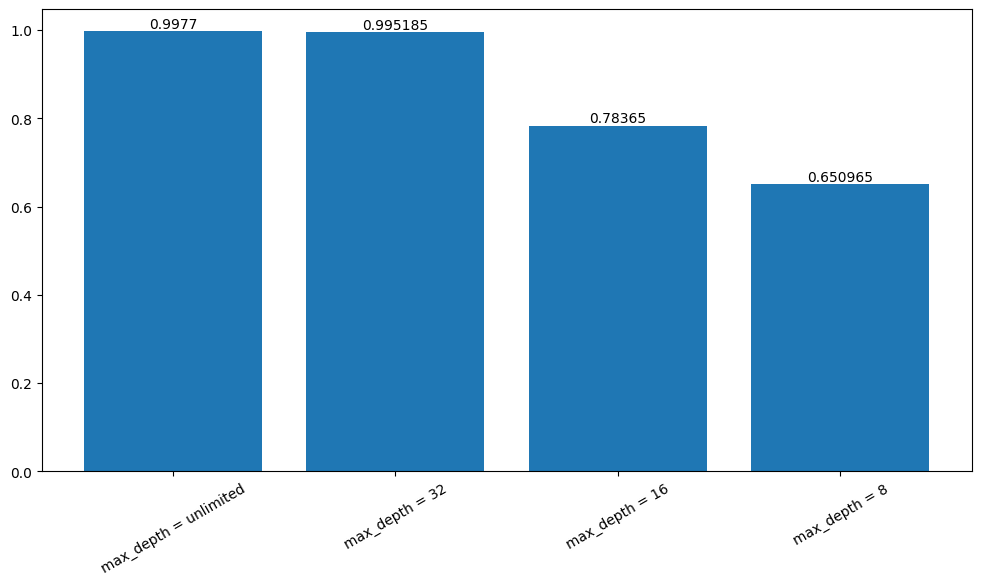

In [52]:
indexes = reducing_depth.keys()
values = reducing_depth.values()

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(indexes, values)
ax.bar_label(bars)
plt.xticks(rotation=30)

plt.savefig('reduce_depth.png')